In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<strong>Probelm Statement -: We need to predict the sales for a company based on the advertising through different channles</strong>

In [2]:
data = pd.read_csv('Advertising.csv')

In [3]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data = data.drop(columns=['Unnamed: 0'])

In [5]:
data.shape

(200, 4)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<strong>We have no null values in our dataset</strong>

<h4>Description of Columns</h4>
<ul>
    <li>TV -: Money spend on TV advertising || Continuos</li>
    <li>radio -: Money spent on radio Advertising || Continuos</li>
    <li>newspaepr -: Money spend on newspaper advertising || Conitnuos</li>
    <li>sales _: Sales of the companey || Continuos || Target Variables</li>
</ul>
<strong>As we are predicting a continuos variable, this is a regression problem</strong>

<h3>Exploratory Data Analysis</h3>

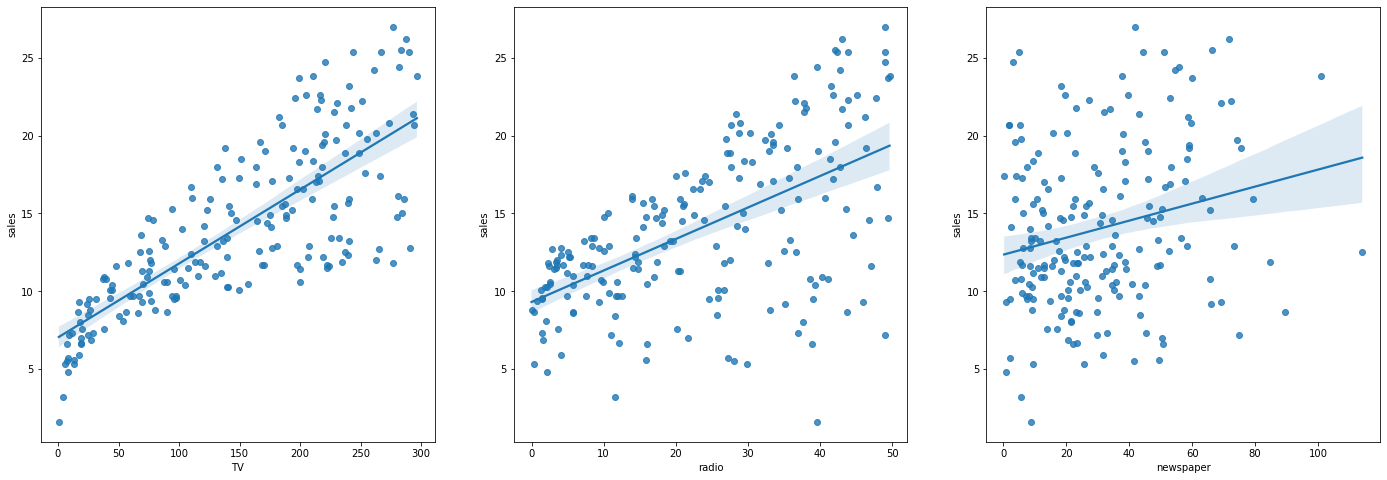

In [8]:
feature_cols = ['TV', 'radio', 'newspaper']
plt.figure(figsize=(24,8))
plotnumber = 1
for col in feature_cols:
    plt.subplot(1,3, plotnumber)
    sns.regplot(col, 'sales', data=data)
    plotnumber+=1

<strong>
    <ul>
        <li>Upwards Trend with TV spendings</li>
        <li>Upwards Trend with radio spendings</li>
        <li>Upwards Trend with newspaper spendings</li>
    </ul>
</strong>

<h3>Correlation Matrix</h3>

In [9]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


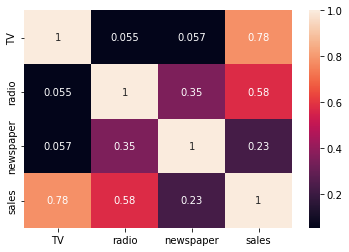

In [10]:

sns.heatmap(data.corr(), annot=True)

<strong>
    <ul>
        <li>Sales have 78% correlation with TV</li>
        <li>Sales have 58% correlation with radio</li>
        <li>Sales have 23% correlation with newspaper</li>
        <li>radio has 35% correlation with newspaper</li>
    </ul>

</strong>

<h3>Descriptive Statistics</h3>

In [11]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<ul>
    <li>TV
        <ul>
            <li>Mean -: 147.04</li>
            <li>STD -: 85.85</li>
            <li>Min -: 0.70</li>
            <li>Max -: 296.64</li>
        </ul>
    </li>
    <li>radio
        <ul>
            <li>Mean -: 23.26</li>
            <li>STD -: 14.84</li>
            <li>Min -: 0</li>
            <li>Max -: 49.6</li>
        </ul>
    </li>
    <li>newspaper
        <ul>
            <li>Mean -: 30.35</li>
            <li>STD -: 21.77</li>
            <li>Min -: 0.3</li>
            <li>Max -: 114.0</li>
        </ul>
    </li>
    <li>sales || Target Variable
        <ul>
            <li>Mean -: 14.02</li>
            <li>STD -: 5.21</li>
            <li>Min -: 1.6</li>
            <li>Max -: 27.00</li>
        </ul>
    </li>
</ul>

<h3>Looking for Outliers</h3>

<h4>Boxplot</h4>

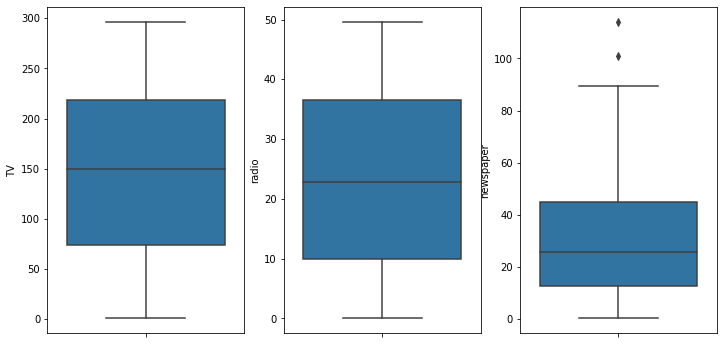

In [12]:
plt.figure(figsize=(12, 6))
plotnumber = 1
for col in feature_cols:
    plt.subplot(1,3, plotnumber)
    sns.boxplot(y=col, data=data)
    plotnumber+=1

<strong>There are two outliers in newspaper column</strong>

In [13]:
data.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

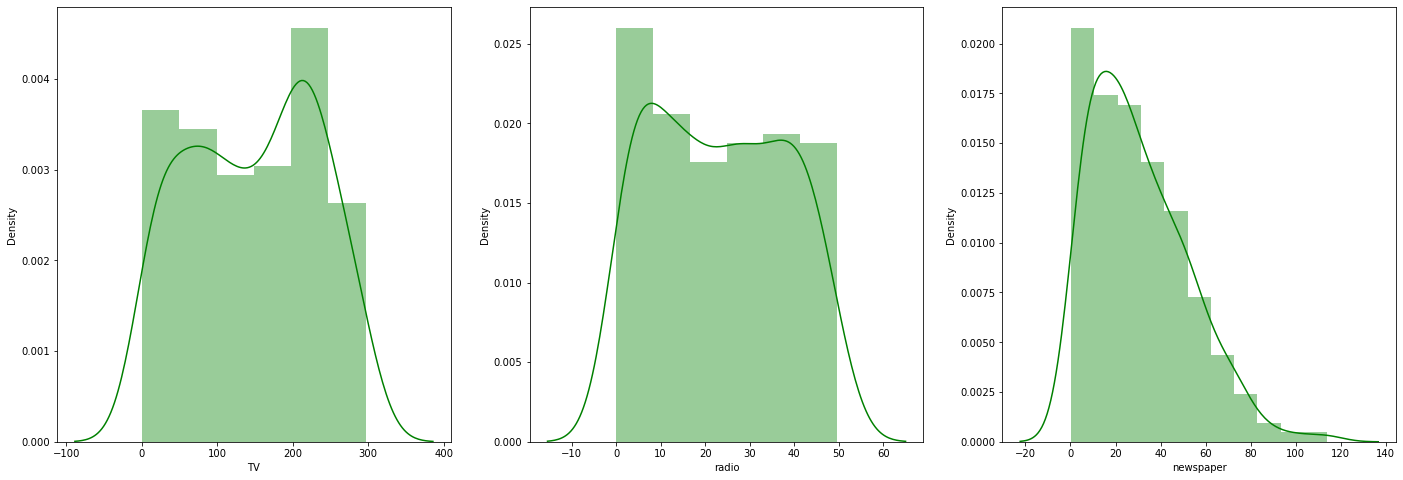

In [14]:
plt.figure(figsize=(24, 8))
plotnumber = 1
for col in feature_cols:
    plt.subplot(1,3, plotnumber)
    sns.distplot(data[col], color='green')
    plotnumber+=1

<strong>Skew is present in newspaper . Rest features follow close to normal distribution</strong>

<h4>Using z-score Technique</h4>

In [15]:
X = data.drop(columns=['sales'])
from scipy.stats import zscore
z = np.abs(zscore(X))
print(z.shape)

data_new = data[(z<3).all(axis=1)]
print("Old Shape", data.shape)
print("New Shape", data_new.shape)
print("Total Dropped Rows", data.shape[0] - data_new.shape[0])

(200, 3)
Old Shape (200, 4)
New Shape (198, 4)
Total Dropped Rows 2


In [16]:
data_new.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

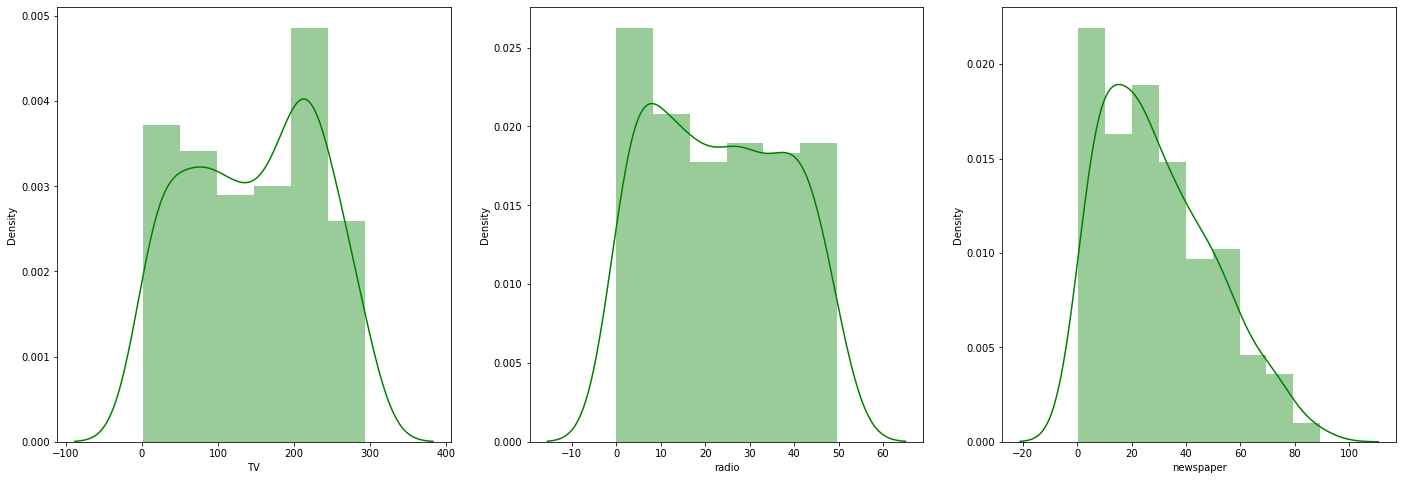

In [17]:
plt.figure(figsize=(24, 8))
plotnumber = 1
for col in feature_cols:
    plt.subplot(1,3, plotnumber)
    sns.distplot(data_new[col], color='green')
    plotnumber+=1

<strong>There is still skew present in newspaepr</strong>

<h4>Power Transform</h4>

In [21]:
X = data_new.drop(columns=['sales'])
y = data_new.sales

In [22]:
from sklearn.preprocessing import power_transform
cols = X.columns
X = power_transform(X, method='yeo-johnson')
X = pd.DataFrame(X, columns=cols)

In [23]:
X

,TV,radio,newspaper
0,0.955983,0.969110,1.604196
1,-1.192003,1.046234,0.831044
2,-1.646125,1.372968,1.607052
3,0.142934,1.147332,1.283768
4,0.456452,-0.735026,1.280622
...,...,...,...
193,-1.288311,-1.423941,-0.687435
194,-0.521579,-1.287689,-1.146090
195,0.416577,-0.862474,-1.314437
196,1.467535,1.182269,1.517395


In [24]:
X.skew()

TV          -0.320682
radio       -0.236668
newspaper   -0.101288
dtype: float64

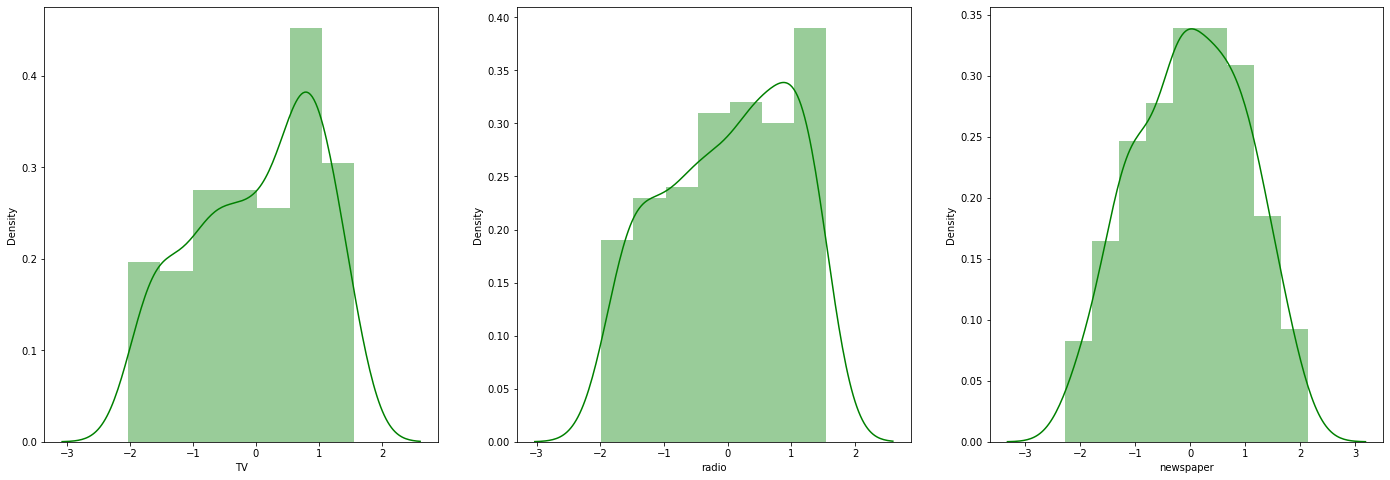

In [25]:
plt.figure(figsize=(24, 8))
plotnumber = 1
for col in feature_cols:
    plt.subplot(1,3, plotnumber)
    sns.distplot(X[col], color='green')
    plotnumber+=1

<strong>Skewness is removed from all columns now</strong>

<h4>Scaling the data</h4>

In [26]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

X = sc.fit_transform(X)

In [28]:
X = pd.DataFrame(X, columns=cols)

In [30]:
X.mean()

TV           3.196097e-17
radio       -5.607187e-19
newspaper    2.467162e-17
dtype: float64

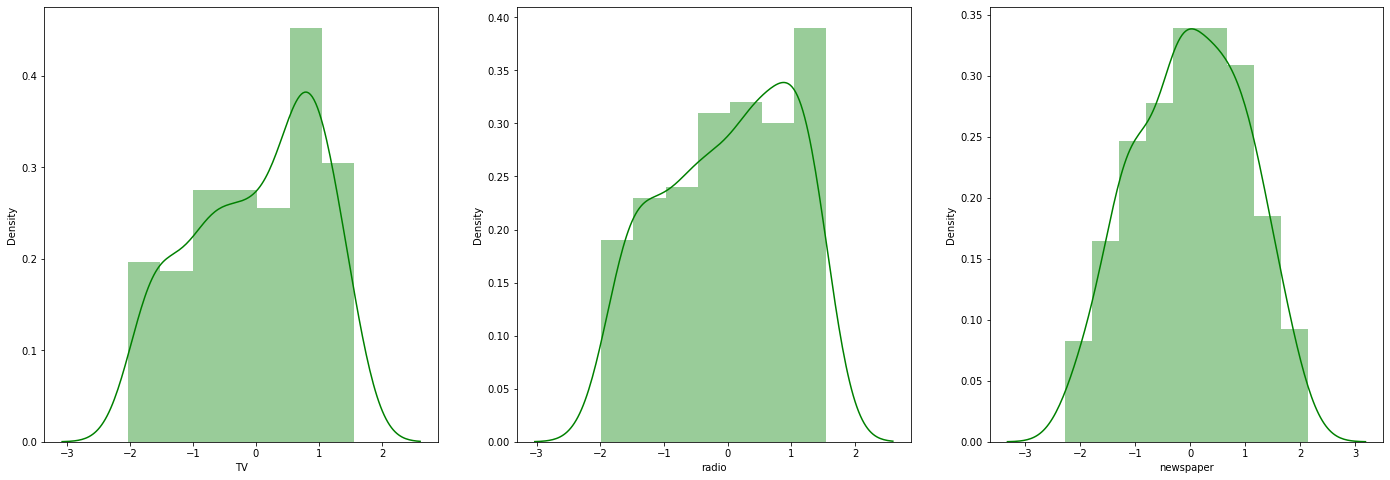

In [31]:
plt.figure(figsize=(24, 8))
plotnumber = 1
for col in feature_cols:
    plt.subplot(1,3, plotnumber)
    sns.distplot(X[col], color='green')
    plotnumber+=1

<strong>Mean is now close to zero</strong>

<h3>MultiCollinearity using VIF</h3>

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = X.columns
vif

,vif,Features
0,1.002693,TV
1,1.088710,radio
2,1.087940,newspaper


<strong>No multiCollinearity Problem</strong>

<h3>Building Models</h3>

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [37]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

<h4>Linear Regression</h4>

________________________________
Training R2 Score : 0.9046797524787555
Training MSE      : 2.5530996026393216
Training MAE      : 1.2143948019433777
Training RMSE     : 1.597842170753833
________________________________
Testing R2 Score : 0.903785365866503
Testing MSE      : 2.609639143066252
Testing MAE      : 1.2405739155966997
Testing RMSE     : 1.6154377558625563


Text(0.5, 1.0, 'Training Data')

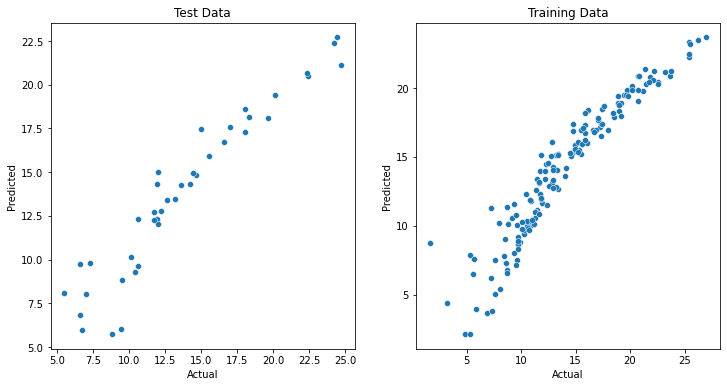

In [41]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = lr.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<h4>Hyperparameter Tuning</h4>

In [86]:
lr = LinearRegression()


grid_parmas = {
    'fit_intercept':[True, False],
    'positive':[True, False]
}
grid_lr = GridSearchCV(lr, param_grid = grid_parmas, cv=3)
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]})

In [87]:
grid_lr.best_score_

0.8914047420402754

In [88]:
grid_lr.best_params_

{'fit_intercept': True, 'positive': True}

In [89]:
best_model = grid_lr.best_estimator_

________________________________
Training R2 Score : 0.9046797524787555
Training MSE      : 2.5530996026393216
Training MAE      : 1.214394801943378
Training RMSE     : 1.597842170753833
________________________________
Testing R2 Score : 0.9037853658665028
Testing MSE      : 2.609639143066256
Testing MAE      : 1.2405739155967008
Testing RMSE     : 1.6154377558625577


Text(0.5, 1.0, 'Training Data')

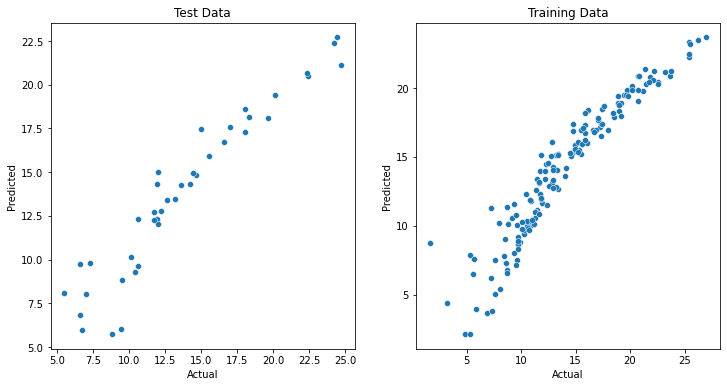

In [90]:
best_model.fit(X_train, y_train)

y_pred_train = best_model.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = best_model.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<h3>XGBregressor</h3>

In [91]:
from xgboost import XGBRegressor

________________________________
Training R2 Score : 0.999999927819298
Training MSE      : 1.9333197954732925e-06
Training MAE      : 0.0010335665714891757
Training RMSE     : 0.0013904387061187892
________________________________
Testing R2 Score : 0.9770151228641433
Testing MSE      : 0.6234211210435572
Testing MAE      : 0.6407607388496401
Testing RMSE     : 0.7895702128649214


Text(0.5, 1.0, 'Training Data')

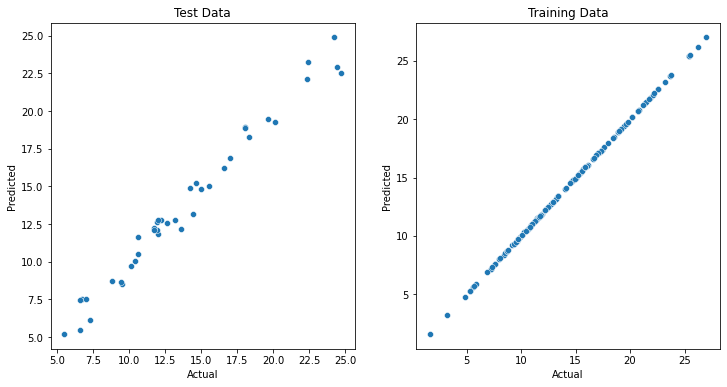

In [92]:
xg = XGBRegressor()
xg.fit(X_train, y_train)

y_pred_train = xg.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = xg.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<h4>Hyperparameter tuning</h4>

In [105]:
xg = XGBRegressor()

grid_params = {
    'n_estimators':[150, 180,200,250,300, 350,400, 450,500],
    'max_depth':[2,3,4,5],
    'learning_rate':[0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5],
    'n_jobs':[-1]
}

grid = GridSearchCV(xg, param_grid=grid_params, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...one,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                             

In [106]:
grid.best_score_

0.9634602541509688

In [107]:
grid.best_params_

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 400, 'n_jobs': -1}

________________________________
Training R2 Score : 0.9975235297938695
Training MSE      : 0.06633087160008459
Training MAE      : 0.19212071805060668
Training RMSE     : 0.25754780449478615
________________________________
Testing R2 Score : 0.9832439092442274
Testing MSE      : 0.45447712517789596
Testing MAE      : 0.5054869771003724
Testing RMSE     : 0.6741491861434648


Text(0.5, 1.0, 'Training Data')

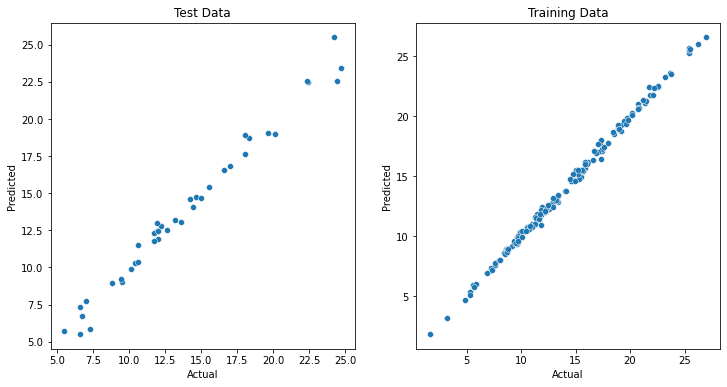

In [108]:
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

y_pred_train = best_model.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = best_model.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<h3>AdaBoost Regressor</h3>

________________________________
Training R2 Score : 0.9779012141427832
Training MSE      : 0.5919036391328821
Training MAE      : 0.6384893663892195
Training RMSE     : 0.769352740381733
________________________________
Testing R2 Score : 0.9654450996335556
Testing MSE      : 0.9372360181291084
Testing MAE      : 0.8264316416682302
Testing RMSE     : 0.9681095073023033


Text(0.5, 1.0, 'Training Data')

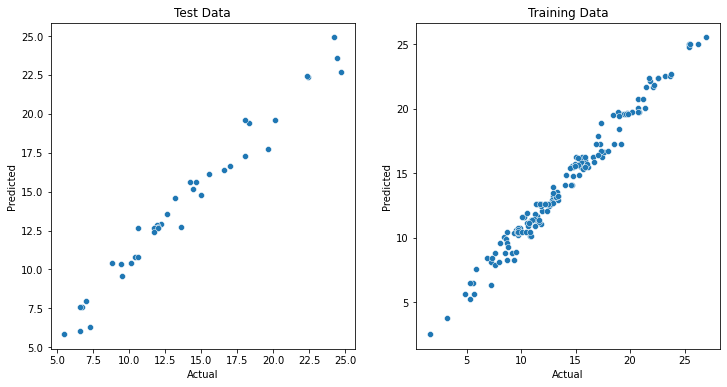

In [59]:
from sklearn.ensemble import AdaBoostRegressor

ad = AdaBoostRegressor()

ad.fit(X_train, y_train)

y_pred_train = ad.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = ad.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<h4>HyperParameter Tuning</h4>

In [66]:
ad = AdaBoostRegressor()

grid_params = {
    'n_estimators':[10,20,30,50,100, 150],
    'learning_rate':[0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.8],
    'loss' : ['linear', 'square', 'exponential']
}

grid = GridSearchCV(ad, param_grid = grid_params, cv=3, n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.3,
                                           0.5, 0.7, 0.8],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [10, 20, 30, 50, 100, 150]})

In [67]:
grid.best_score_

0.9377472410330415

In [68]:
grid.best_params_

{'learning_rate': 0.8, 'loss': 'square', 'n_estimators': 50}

________________________________
Training R2 Score : 0.9735332006449074
Training MSE      : 0.7088984415568297
Training MAE      : 0.6976870364890447
Training RMSE     : 0.8419610689080759
________________________________
Testing R2 Score : 0.9652575315216171
Testing MSE      : 0.9423234467860286
Testing MAE      : 0.842144363196325
Testing RMSE     : 0.9707334581572991


Text(0.5, 1.0, 'Training Data')

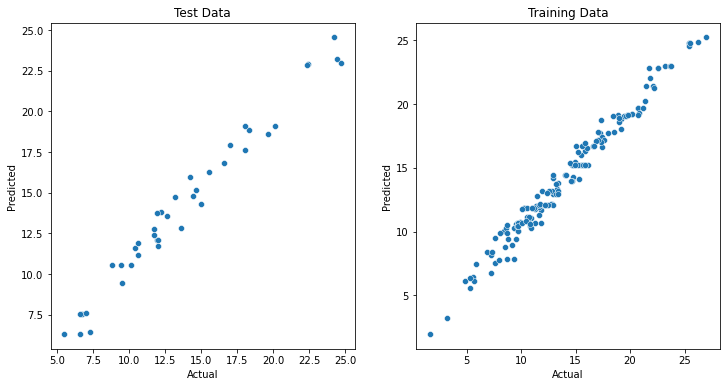

In [69]:
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

y_pred_train = best_model.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = best_model.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<h3>RandomForest Regressor</h3>

In [70]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

________________________________
Training R2 Score : 0.9967999375395201
Training MSE      : 0.0857118860759491
Training MAE      : 0.21894936708860754
Training RMSE     : 0.2927659236932282
________________________________
Testing R2 Score : 0.9835425780976362
Testing MSE      : 0.4463763000000034
Testing MAE      : 0.5562000000000026
Testing RMSE     : 0.6681139872806162


Text(0.5, 1.0, 'Training Data')

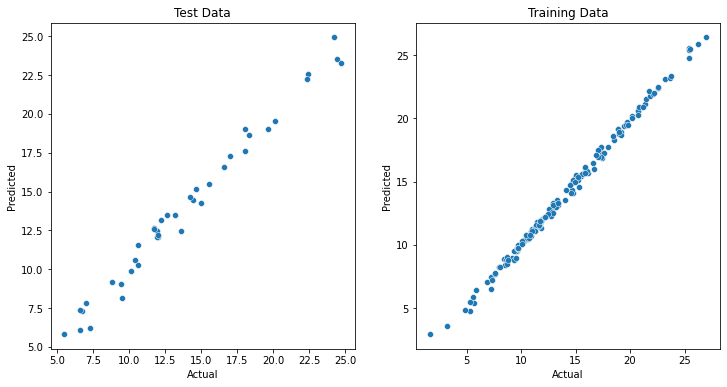

In [71]:
rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = rf.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<h4>Hyperparameter Tuning</h4>

In [76]:
rf = RandomForestRegressor()

grid_param = {
    'n_estimators': [30,40,50,80,100,120,130,150],
    'min_samples_split':[2,3,4,5,6],
    'min_samples_leaf':[2,3,4,5,6],
    'max_leaf_nodes':[3,5,7,10,20,30]
}

grid = GridSearchCV(rf, param_grid = grid_param, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_leaf_nodes': [3, 5, 7, 10, 20, 30],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [30, 40, 50, 80, 100, 120, 130, 150]})

In [77]:
grid.best_score_

0.9545367958557502

In [74]:
grid.best_params_

{'max_depth': 5,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 40}

________________________________
Training R2 Score : 0.9892608603385147
Training MSE      : 0.2876418590532451
Training MAE      : 0.4100758813076147
Training RMSE     : 0.5363225326734326
________________________________
Testing R2 Score : 0.9746377459787997
Testing MSE      : 0.6879029520424164
Testing MAE      : 0.6750858991282062
Testing RMSE     : 0.8293991512187702


Text(0.5, 1.0, 'Training Data')

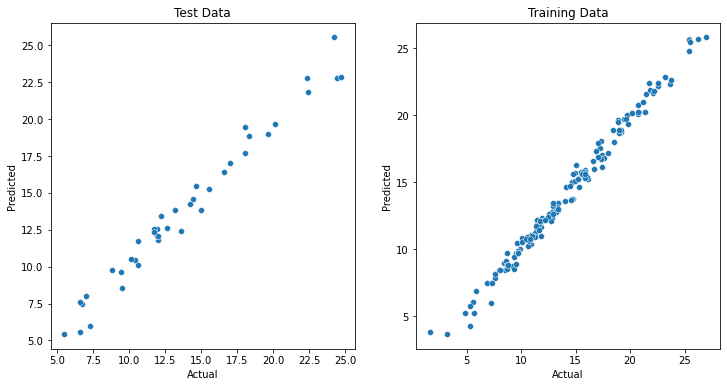

In [75]:
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

y_pred_train = best_model.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = best_model.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<h3>KNNRegressor</h3>

________________________________
Training R2 Score : 0.9569266285279463
Training MSE      : 1.1536962025316455
Training MAE      : 0.7379746835443037
Training RMSE     : 1.07410251025293
________________________________
Testing R2 Score : 0.9292470255981065
Testing MSE      : 1.9190400000000003
Testing MAE      : 0.9490000000000002
Testing RMSE     : 1.3852941925814892


Text(0.5, 1.0, 'Training Data')

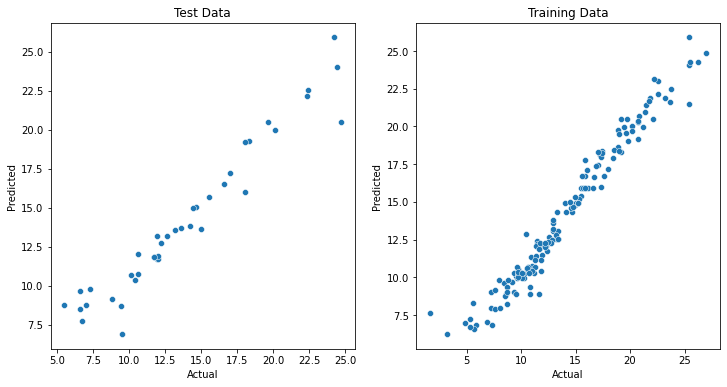

In [78]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = knn.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<h4>Hyperparameter Tuning</h4>

In [80]:
knn = KNeighborsRegressor()

grid_param = {
    'n_neighbors':[3,4,5,6,7],
    'weights' : ['uniform', 'distance'],
    'p':[1,2]
}

grid = GridSearchCV(knn, param_grid = grid_param, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 4, 5, 6, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [81]:
grid.best_score_

0.9095792026850503

In [84]:
grid.best_params_

{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

________________________________
Training R2 Score : 1.0
Training MSE      : 0.0
Training MAE      : 0.0
Training RMSE     : 0.0
________________________________
Testing R2 Score : 0.9448474238481488
Testing MSE      : 1.4959088382242764
Testing MAE      : 0.9459595804184755
Testing RMSE     : 1.2230735211851642


Text(0.5, 1.0, 'Training Data')

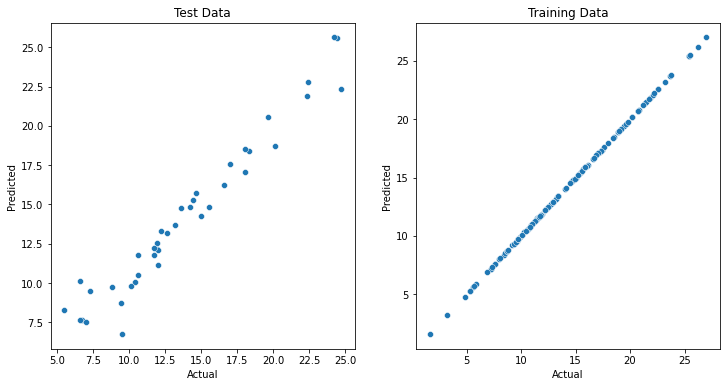

In [85]:
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

y_pred_train = best_model.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = best_model.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<strong>XGBRegressor is the best performing model as it has the least difference between cv score and test score, and it also performms well on test data</strong>

<h3>Builiding Final Model to Save</h3>

In [109]:
import pickle
final_model= XGBRegressor(learning_rate= 0.05, max_depth= 2, n_estimators= 400, n_jobs=-1)
final_model.fit(X_train, y_train)

filename = 'final_model.piclke'
pickle.dump(final_model, open(filename, 'wb'))